In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iyzico-datathon/sample_submission.csv
/kaggle/input/iyzico-datathon/train.csv


In [2]:
import warnings

# Float sayıları iki ondalık basamağa kadar göster
pd.set_option('display.float_format', '{:.2f}'.format)

# Uyarı (warning) mesajlarını gizle
warnings.filterwarnings('ignore')

In [3]:
# Kütüphanelerin import edilmesi
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [4]:
# Verilerin okunması
train = pd.read_csv("/kaggle/input/iyzico-datathon/train.csv")
submission = pd.read_csv("/kaggle/input/iyzico-datathon/sample_submission.csv")

In [5]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78180 entries, 0 to 78179
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 78180 non-null  object
 1   net_payment_count  78180 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [6]:
submission.head(10)

,id,net_payment_count
0,202311merchant_36004,0
1,202312merchant_36004,0
2,202310merchant_36004,0
3,202311merchant_23099,0
4,202312merchant_23099,0
5,202310merchant_23099,0
6,202311merchant_13105,0
7,202312merchant_13105,0
8,202310merchant_13105,0
9,202311merchant_32059,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291142 entries, 0 to 291141
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   merchant_id           291142 non-null  object
 1   month_id              291142 non-null  int64 
 2   merchant_source_name  291142 non-null  object
 3   settlement_period     291142 non-null  object
 4   working_type          291142 non-null  object
 5   mcc_id                291142 non-null  object
 6   merchant_segment      291142 non-null  object
 7   net_payment_count     291142 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.8+ MB


In [8]:
train.head(10)

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428
5,merchant_43992,202304,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15329
6,merchant_43992,202207,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,7225
7,merchant_43992,202208,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,10056
8,merchant_43992,202210,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,14413
9,merchant_43992,202211,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13893


In [9]:
test = submission.copy()
test["month_id"] = test["id"].apply(lambda x: x[:6])
test["merchant_id"] = test["id"].apply(lambda x: x[6:])
test["net_payment_count"] = np.nan
test = test[["merchant_id", "month_id", "net_payment_count"]]

test = test.merge(
    train[
        [
            "merchant_id",
            "merchant_source_name",
            "settlement_period",
            "working_type",
            "mcc_id",
            "merchant_segment",
        ]
    ].drop_duplicates(),
    on=["merchant_id"],
    how="left",
)

test.head()

,merchant_id,month_id,net_payment_count,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment
0,merchant_36004,202311,NaN,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_144,Segment - 4
1,merchant_36004,202312,NaN,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_144,Segment - 4
2,merchant_36004,202310,NaN,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_144,Segment - 4
3,merchant_23099,202311,NaN,Merchant Source - 1,Settlement Period - 1,Working Type - 5,mcc_3,Segment - 4
4,merchant_23099,202312,NaN,Merchant Source - 1,Settlement Period - 1,Working Type - 5,mcc_3,Segment - 4


In [10]:
train['period'] = pd.to_datetime(train['month_id'], format='%Y%m')

# Yeni tarih sütunları ekleyebilirsiniz (isteğe bağlı)
train['year'] = train['period'].dt.year
train['month'] = train['period'].dt.month

# 'month_id' sütununu 'YYYYMM' formatında bir tarih sütunu olarak dönüştürme
train['month_id'] = train['month_id'].astype(str)

In [11]:
test['period'] = pd.to_datetime(test['month_id'], format='%Y%m')

# Yeni tarih sütunları ekleyebilirsiniz (isteğe bağlı)
test['year'] = test['period'].dt.year
test['month'] = test['period'].dt.month

# 'month_id' sütununu 'YYYYMM' formatında bir tarih sütunu olarak dönüştürme
test['month_id'] = test['month_id'].astype(str)

In [12]:
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,period,year,month
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106,2023-07-01,2023,7
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918,2023-01-01,2023,1
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452,2023-05-01,2023,5
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787,2023-08-01,2023,8
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428,2023-02-01,2023,2


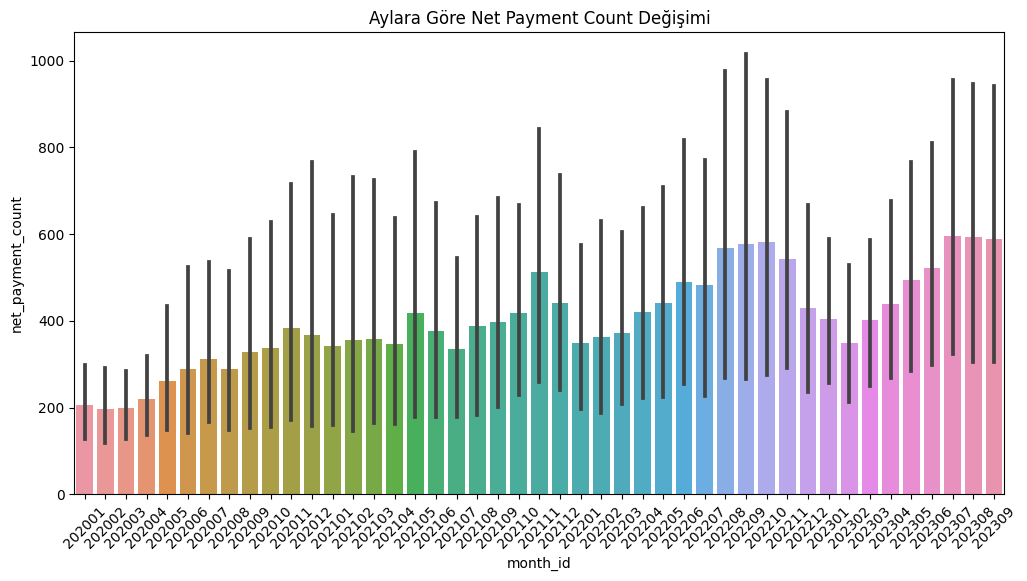

In [13]:
# Month_id sütunu için bar grafiği (küçükten büyüğe sıralı)
plt.figure(figsize=(12, 6))
sns.barplot(x='month_id', y='net_payment_count', data=train, order=sorted(train['month_id'].unique(), key=lambda x: int(x)))
plt.title('Aylara Göre Net Payment Count Değişimi')
plt.xticks(rotation=45)
plt.show()

In [14]:
# year ve month sütunlarını "object" olarak dönüştürme
train['year'] = train['year'].astype(str)
train['month'] = train['month'].astype(str)

# period sütununu silme
train.drop(columns=['period'], inplace=True)  # inplace=True ile veri setinde doğrudan değişiklik yapılır

In [15]:
# year ve month sütunlarını "object" olarak dönüştürme
test['year'] = test['year'].astype(str)
test['month'] = test['month'].astype(str)

# period sütununu silme
test.drop(columns=['period'], inplace=True)

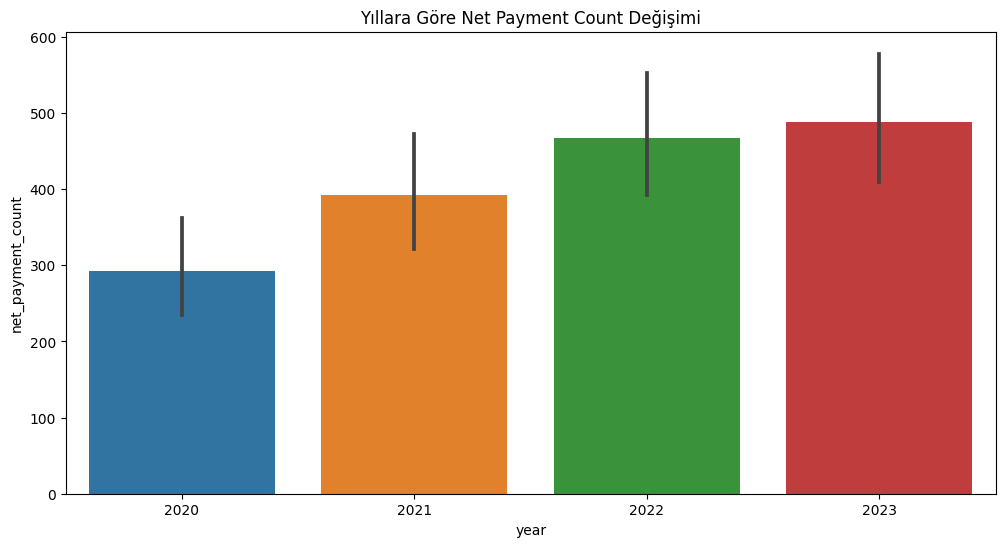

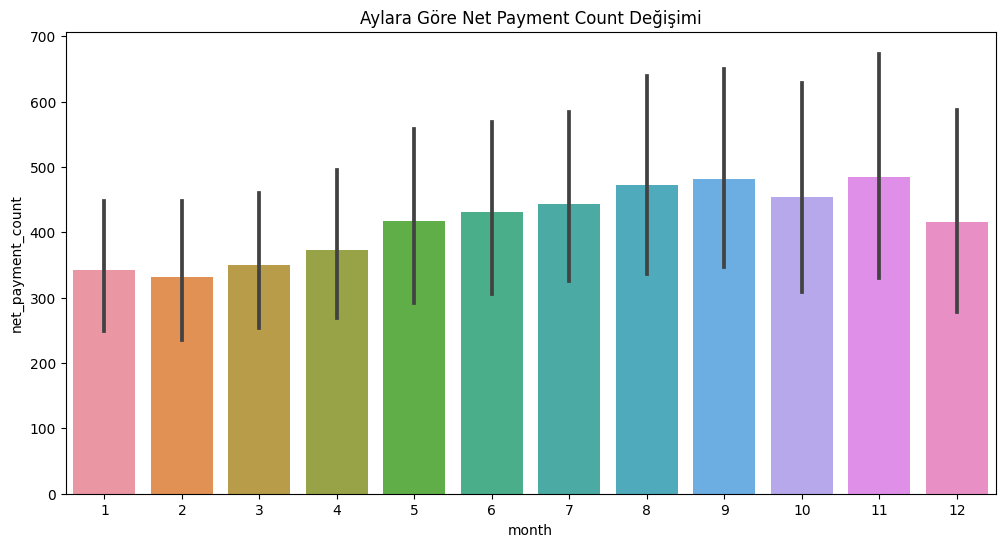

In [16]:
# Year sütunu için bar grafiği (küçükten büyüğe sıralı)
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='net_payment_count', data=train, order=sorted(train['year'].unique()))
plt.title('Yıllara Göre Net Payment Count Değişimi')
plt.show()

# Month sütunu için bar grafiği (küçükten büyüğe sıralı)
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='net_payment_count', data=train, order=sorted(train['month'].unique(), key=lambda x: int(x)))
plt.title('Aylara Göre Net Payment Count Değişimi')
plt.show()

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
net_payment_count,291142.00,415.38,10820.67,-1433.00,4.00,6.00,14.00,1160429.00


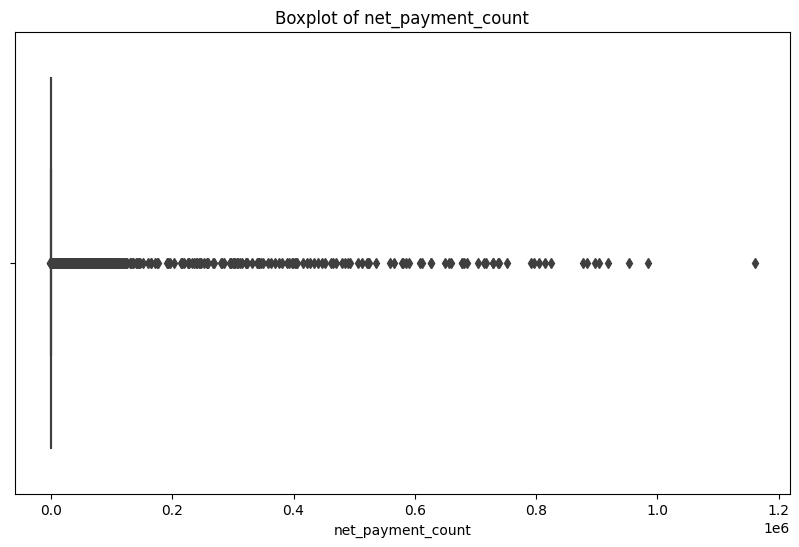

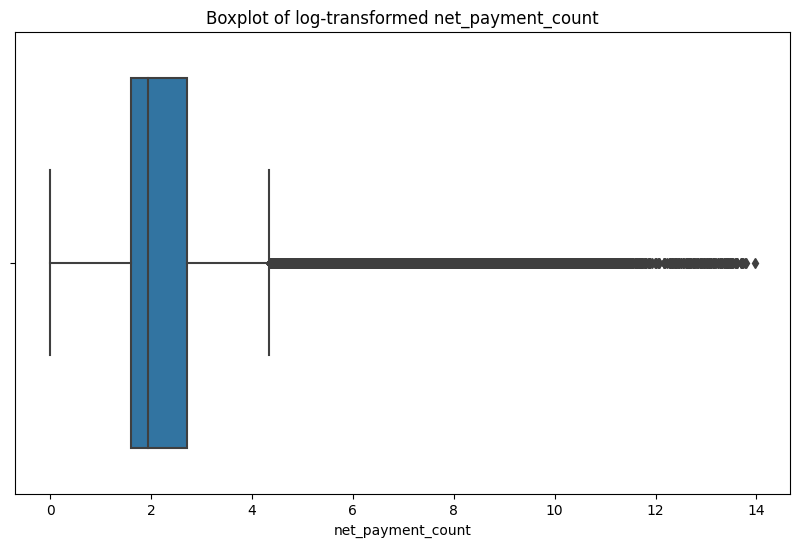

In [18]:
# Kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['net_payment_count'])
plt.title('Boxplot of net_payment_count')
plt.show()

# Log-transform uygulayarak kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x=np.log1p(train['net_payment_count']))
plt.title('Boxplot of log-transformed net_payment_count')
plt.show()

In [19]:
# Z-Score hesaplama fonksiyonunu tanımla
def calculate_z_scores(series):
    return (series - series.mean()) / series.std()

# Merchant_id'leri filtrele (30 ve daha fazla adet olanları al)
selected_merchants = train['merchant_id'].value_counts()[train['merchant_id'].value_counts() >= 30].index

# Her bir seçili merchant için işlem yap
for merchant_id in selected_merchants:
    # Merchant'a ait net_payment_count'ları al
    merchant_data = train[train['merchant_id'] == merchant_id]['net_payment_count']
    
    # Z-Score hesapla
    z_scores_merchant = calculate_z_scores(merchant_data)
    
    # Aykırı değerleri belirle
    outliers_merchant = (z_scores_merchant < -3) | (z_scores_merchant > 3)
    
    # Aykırı değer sayısını ve istatistiksel özeti yazdır
#     print(f"Aykırı değer sayısı (Z skoru) - Merchant {merchant_id}: {outliers_merchant.sum()}")
#     print(train.loc[train['merchant_id'] == merchant_id, 'net_payment_count'].describe())
    
    # Aykırı değerleri hariç tut
    filtered_data_merchant = merchant_data[~outliers_merchant]
    
    # Aykırı değerlere sahip olmayan veri setinin describe'ını incele
#     print(filtered_data_merchant.describe())
    
    # Aykırı değerlere sahip orijinal veri setine uygula
    train.loc[train['merchant_id'] == merchant_id, 'net_payment_count'] = filtered_data_merchant.mean()

In [20]:
# Merchant_id'leri filtrele (30'den daha az adet olanları al)
less_than_20_merchants = train['merchant_id'].value_counts()[train['merchant_id'].value_counts() < 30].index

# Ana veri setinin net_payment_count üzerindeki z-score'larını hesapla
z_scores_all = calculate_z_scores(train['net_payment_count'])

# 25'ten az gözlem içeren şirketlerin aykırı değerleri ana veri setinin mean() değeri ile değiştir
train.loc[train['merchant_id'].isin(less_than_20_merchants), 'net_payment_count'] = train['net_payment_count'].median()

In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
net_payment_count,291142.00,367.40,8615.28,3.23,6.00,6.00,8.07,489406.31


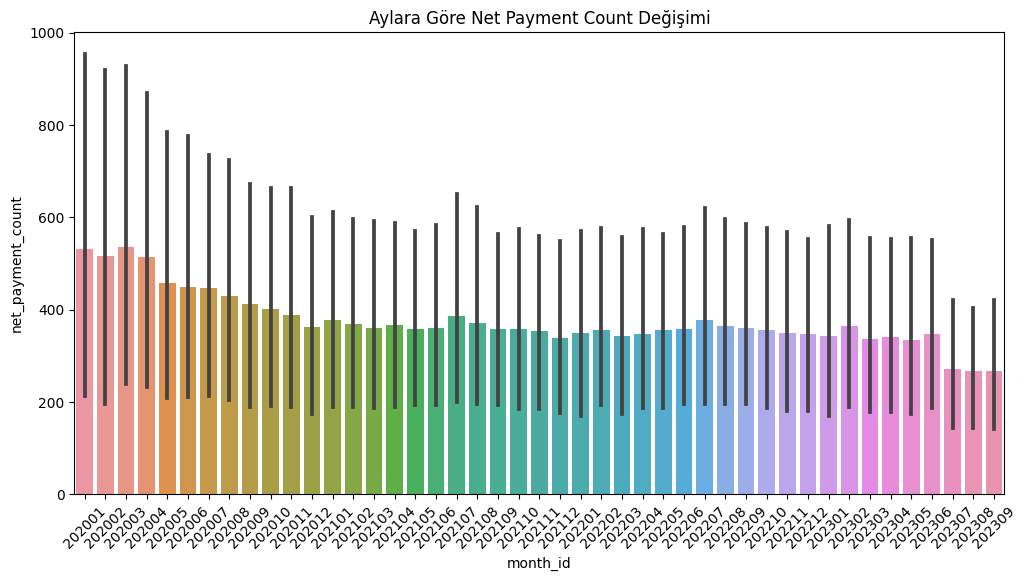

In [22]:
# Month_id sütunu için bar grafiği (küçükten büyüğe sıralı)
plt.figure(figsize=(12, 6))
sns.barplot(x='month_id', y='net_payment_count', data=train, order=sorted(train['month_id'].unique(), key=lambda x: int(x)))
plt.title('Aylara Göre Net Payment Count Değişimi')
plt.xticks(rotation=45)
plt.show()

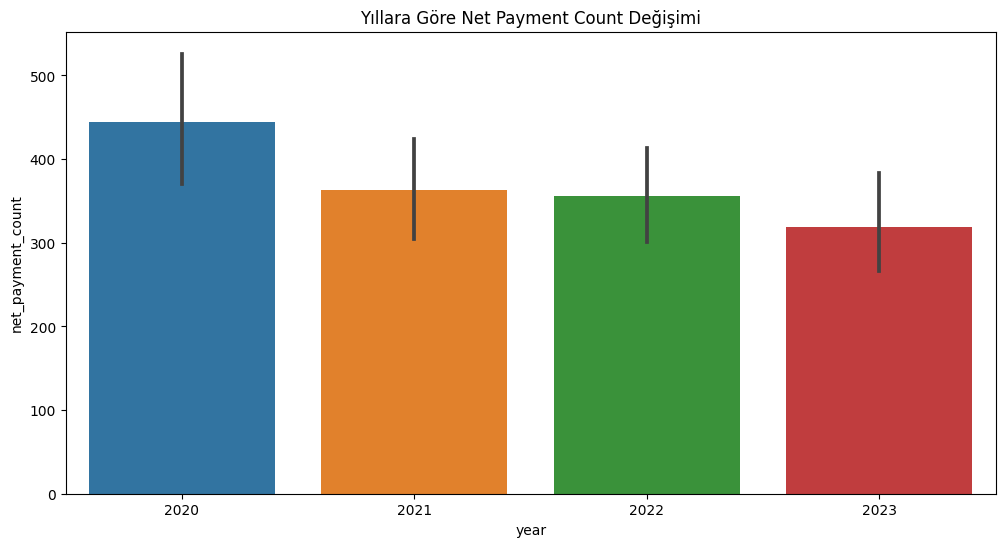

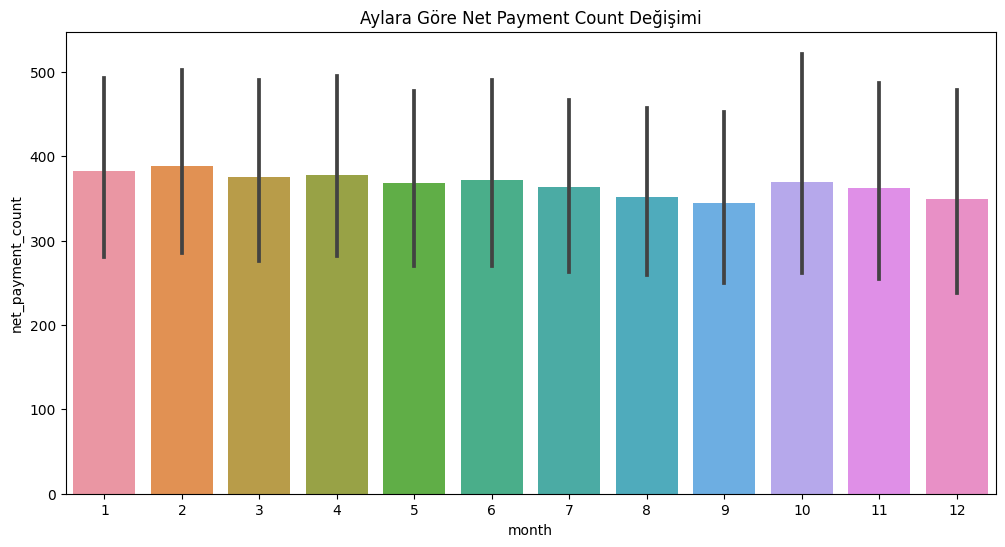

In [23]:
# Year sütunu için bar grafiği (küçükten büyüğe sıralı)
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='net_payment_count', data=train, order=sorted(train['year'].unique()))
plt.title('Yıllara Göre Net Payment Count Değişimi')
plt.show()

# Month sütunu için bar grafiği (küçükten büyüğe sıralı)
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='net_payment_count', data=train, order=sorted(train['month'].unique(), key=lambda x: int(x)))
plt.title('Aylara Göre Net Payment Count Değişimi')
plt.show()

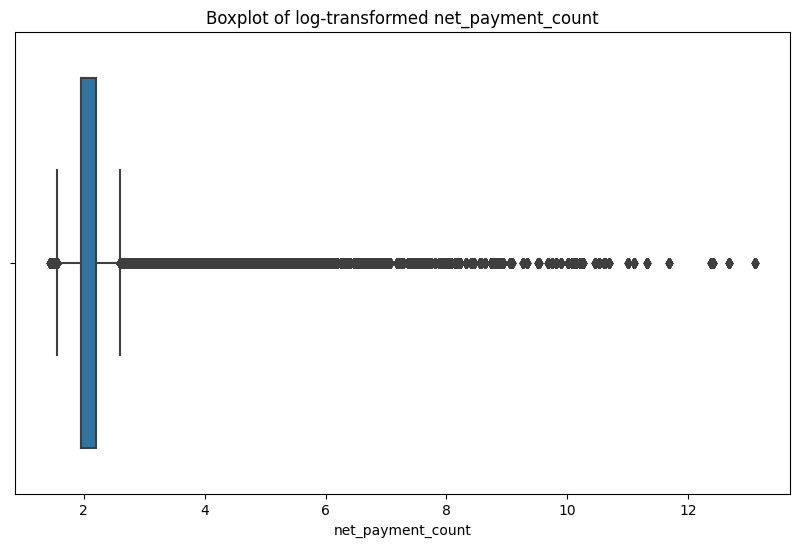

In [24]:
# Log-transform uygulayarak kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x=np.log1p(train['net_payment_count']))
plt.title('Boxplot of log-transformed net_payment_count')
plt.show()

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291142 entries, 0 to 291141
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   merchant_id           291142 non-null  object 
 1   month_id              291142 non-null  object 
 2   merchant_source_name  291142 non-null  object 
 3   settlement_period     291142 non-null  object 
 4   working_type          291142 non-null  object 
 5   mcc_id                291142 non-null  object 
 6   merchant_segment      291142 non-null  object 
 7   net_payment_count     291142 non-null  float64
 8   year                  291142 non-null  object 
 9   month                 291142 non-null  object 
dtypes: float64(1), object(9)
memory usage: 22.2+ MB


In [26]:
print(train["merchant_id"].value_counts())
print(train["merchant_source_name"].value_counts())
print(train["settlement_period"].value_counts())
print(train["working_type"].value_counts())
print(train["mcc_id"].value_counts())
print(train["merchant_segment"].value_counts())

merchant_id
merchant_43992    45
merchant_19380    45
merchant_1100     45
merchant_17200    45
merchant_65293    45
                  ..
merchant_3063      1
merchant_35756     1
merchant_50399     1
merchant_56272     1
merchant_66895     1
Name: count, Length: 26060, dtype: int64
merchant_source_name
Merchant Source - 1    164996
Merchant Source - 2    112541
Merchant Source - 3     13605
Name: count, dtype: int64
settlement_period
Settlement Period - 1    268906
Settlement Period - 3     20553
Settlement Period - 2      1683
Name: count, dtype: int64
working_type
Working Type - 6    128755
Working Type - 5    116793
Working Type - 2     40071
Working Type - 3      5204
Working Type - 4       255
Working Type - 1        64
Name: count, dtype: int64
mcc_id
mcc_42     40543
mcc_35     29872
mcc_83     13283
mcc_110    13126
mcc_24     12388
           ...  
mcc_16         1
mcc_57         1
mcc_71         1
mcc_43         1
mcc_90         1
Name: count, Length: 172, dtype: int64
merch

In [27]:
from sklearn.feature_extraction import FeatureHasher

def hashing_trick(data, col, n_features=10):
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    hashed_features = hasher.transform(data[col].astype(str).apply(lambda x: [x])).toarray()
    hashed_df = pd.DataFrame(hashed_features, columns=[f'{col}_hash_{i}' for i in range(n_features)])
    return pd.concat([data, hashed_df], axis=1).drop(col, axis=1)

# Hashing işlemi uygulayalım
# train = hashing_trick(train, 'merchant_id', n_features=10)
train = hashing_trick(train, 'mcc_id', n_features=10)

In [28]:
# # Target Encoding Columns
# target_encoders = {
#     'merchant_id': ce.TargetEncoder(),
#     'mcc_id': ce.TargetEncoder()
# }

# One-Hot Encoding Columns
one_hot_cols = ['merchant_source_name', 'working_type', 'merchant_segment']

# # Target Encoding for mcc_id and merchant_id
# for col, encoder in target_encoders.items():
#     train[col] = encoder.fit_transform(train[col], train['net_payment_count'])

# One-Hot Encoding for one_hot_cols
train = pd.get_dummies(train, columns=one_hot_cols, drop_first=True)

# Label Encoding for settlement_period
label_encoder = ce.OrdinalEncoder(cols=['settlement_period'])
train = label_encoder.fit_transform(train)

In [29]:
train.head()

,merchant_id,month_id,settlement_period,net_payment_count,year,month,mcc_id_hash_0,mcc_id_hash_1,mcc_id_hash_2,mcc_id_hash_3,...,merchant_source_name_Merchant Source - 2,merchant_source_name_Merchant Source - 3,working_type_Working Type - 2,working_type_Working Type - 3,working_type_Working Type - 4,working_type_Working Type - 5,working_type_Working Type - 6,merchant_segment_Segment - 2,merchant_segment_Segment - 3,merchant_segment_Segment - 4
0,merchant_43992,202307,1,8509.69,2023,7,1.00,0.00,0.00,0.00,...,False,True,True,False,False,False,False,True,False,False
1,merchant_43992,202301,1,8509.69,2023,1,1.00,0.00,0.00,0.00,...,False,True,True,False,False,False,False,True,False,False
2,merchant_43992,202305,1,8509.69,2023,5,1.00,0.00,0.00,0.00,...,False,True,True,False,False,False,False,True,False,False
3,merchant_43992,202308,1,8509.69,2023,8,1.00,0.00,0.00,0.00,...,False,True,True,False,False,False,False,True,False,False
4,merchant_43992,202302,1,8509.69,2023,2,1.00,0.00,0.00,0.00,...,False,True,True,False,False,False,False,True,False,False


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291142 entries, 0 to 291141
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   merchant_id                               291142 non-null  object 
 1   month_id                                  291142 non-null  object 
 2   settlement_period                         291142 non-null  int64  
 3   net_payment_count                         291142 non-null  float64
 4   year                                      291142 non-null  object 
 5   month                                     291142 non-null  object 
 6   mcc_id_hash_0                             291142 non-null  float64
 7   mcc_id_hash_1                             291142 non-null  float64
 8   mcc_id_hash_2                             291142 non-null  float64
 9   mcc_id_hash_3                             291142 non-null  float64
 10  mcc_id_hash_4       

In [31]:
train['settlement_period'] = train['settlement_period'].astype(object)
# train['merchant_id_hash_0'] = train['merchant_id_hash_0'].astype(object)
# train['merchant_id_hash_1'] = train['merchant_id_hash_1'].astype(object)
# train['merchant_id_hash_2'] = train['merchant_id_hash_2'].astype(object)
# train['merchant_id_hash_3'] = train['merchant_id_hash_3'].astype(object)
# train['merchant_id_hash_4'] = train['merchant_id_hash_4'].astype(object)
# train['merchant_id_hash_5'] = train['merchant_id_hash_5'].astype(object)
# train['merchant_id_hash_6'] = train['merchant_id_hash_6'].astype(object)
# train['merchant_id_hash_7'] = train['merchant_id_hash_7'].astype(object)
# train['merchant_id_hash_8'] = train['merchant_id_hash_8'].astype(object)
# train['merchant_id_hash_9'] = train['merchant_id_hash_9'].astype(object)
train['mcc_id_hash_0'] = train['mcc_id_hash_0'].astype(object)
train['mcc_id_hash_1'] = train['mcc_id_hash_1'].astype(object)
train['mcc_id_hash_2'] = train['mcc_id_hash_2'].astype(object)
train['mcc_id_hash_3'] = train['mcc_id_hash_3'].astype(object)
train['mcc_id_hash_4'] = train['mcc_id_hash_4'].astype(object)
train['mcc_id_hash_5'] = train['mcc_id_hash_5'].astype(object)
train['mcc_id_hash_6'] = train['mcc_id_hash_6'].astype(object)
train['mcc_id_hash_7'] = train['mcc_id_hash_7'].astype(object)
train['mcc_id_hash_8'] = train['mcc_id_hash_8'].astype(object)
train['mcc_id_hash_9'] = train['mcc_id_hash_9'].astype(object)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291142 entries, 0 to 291141
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   merchant_id                               291142 non-null  object 
 1   month_id                                  291142 non-null  object 
 2   settlement_period                         291142 non-null  object 
 3   net_payment_count                         291142 non-null  float64
 4   year                                      291142 non-null  object 
 5   month                                     291142 non-null  object 
 6   mcc_id_hash_0                             291142 non-null  object 
 7   mcc_id_hash_1                             291142 non-null  object 
 8   mcc_id_hash_2                             291142 non-null  object 
 9   mcc_id_hash_3                             291142 non-null  object 
 10  mcc_id_hash_4       

In [33]:
def hashing_trick(data, col, n_features=10):
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    hashed_features = hasher.transform(data[col].astype(str).apply(lambda x: [x])).toarray()
    hashed_df = pd.DataFrame(hashed_features, columns=[f'{col}_hash_{i}' for i in range(n_features)])
    return pd.concat([data, hashed_df], axis=1).drop(col, axis=1)

# Hashing işlemi uygulayalım
# test = hashing_trick(test, 'merchant_id', n_features=10)
test = hashing_trick(test, 'mcc_id', n_features=10)

In [34]:
# One-Hot Encoding Columns
one_hot_cols = ['merchant_source_name', 'working_type', 'merchant_segment']

# One-Hot Encoding for one_hot_cols
test = pd.get_dummies(test, columns=one_hot_cols, drop_first=True)

# Label Encoding for settlement_period
label_encoder = ce.OrdinalEncoder(cols=['settlement_period'])
test = label_encoder.fit_transform(test)

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78180 entries, 0 to 78179
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   merchant_id                               78180 non-null  object 
 1   month_id                                  78180 non-null  object 
 2   net_payment_count                         0 non-null      float64
 3   settlement_period                         78180 non-null  int64  
 4   year                                      78180 non-null  object 
 5   month                                     78180 non-null  object 
 6   mcc_id_hash_0                             78180 non-null  float64
 7   mcc_id_hash_1                             78180 non-null  float64
 8   mcc_id_hash_2                             78180 non-null  float64
 9   mcc_id_hash_3                             78180 non-null  float64
 10  mcc_id_hash_4                     

In [36]:
test['settlement_period'] = test['settlement_period'].astype(object)
# test['merchant_id_hash_0'] = test['merchant_id_hash_0'].astype(object)
# test['merchant_id_hash_1'] = test['merchant_id_hash_1'].astype(object)
# test['merchant_id_hash_2'] = test['merchant_id_hash_2'].astype(object)
# test['merchant_id_hash_3'] = test['merchant_id_hash_3'].astype(object)
# test['merchant_id_hash_4'] = test['merchant_id_hash_4'].astype(object)
# test['merchant_id_hash_5'] = test['merchant_id_hash_5'].astype(object)
# test['merchant_id_hash_6'] = test['merchant_id_hash_6'].astype(object)
# test['merchant_id_hash_7'] = test['merchant_id_hash_7'].astype(object)
# test['merchant_id_hash_8'] = test['merchant_id_hash_8'].astype(object)
# test['merchant_id_hash_9'] = test['merchant_id_hash_9'].astype(object)
test['mcc_id_hash_0'] = test['mcc_id_hash_0'].astype(object)
test['mcc_id_hash_1'] = test['mcc_id_hash_1'].astype(object)
test['mcc_id_hash_2'] = test['mcc_id_hash_2'].astype(object)
test['mcc_id_hash_3'] = test['mcc_id_hash_3'].astype(object)
test['mcc_id_hash_4'] = test['mcc_id_hash_4'].astype(object)
test['mcc_id_hash_5'] = test['mcc_id_hash_5'].astype(object)
test['mcc_id_hash_6'] = test['mcc_id_hash_6'].astype(object)
test['mcc_id_hash_7'] = test['mcc_id_hash_7'].astype(object)
test['mcc_id_hash_8'] = test['mcc_id_hash_8'].astype(object)
test['mcc_id_hash_9'] = test['mcc_id_hash_9'].astype(object)

In [37]:
def remove_first_n_chars(df, col_name, n=9):
    """
    Verilen bir DataFrame'deki belirli bir kolondaki tüm satırlardan
    belirtilen sayıda karakteri silen fonksiyon.

    Parameters:
    - df: DataFrame
        Veri seti
    - col_name: str
        İşlem yapılacak kolonun adı
    - n: int
        Silinecek karakter sayısı (varsayılan: 9)

    Returns:
    - DataFrame
        İşlenmiş veri seti
    """
    df_copy = df.copy()  # orijinal veriyi korumak için kopya oluştur

    # Belirtilen kolondaki tüm satırlardan ilk n karakteri sil
    df_copy[col_name] = df_copy[col_name].str[n:]

    return df_copy

# Fonksiyonu kullanarak merchant_id kolonundan ilk 9 karakteri silme
train = remove_first_n_chars(train, 'merchant_id', n=9)

In [38]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = train.drop('net_payment_count', axis=1)
y = train['net_payment_count']

# Veri setini eğitim ve test setlerine böleme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Model seçimi ve eğitimi
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_model.predict(X_test)

# Model performansını değerlendirme
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.0534854388281563


In [40]:
# # Grid Search için parametre aralıkları
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Random Forest Regressor modeli
# rf_model = RandomForestRegressor(random_state=42)

# # Grid Search uygulama
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # En iyi parametre setini bulma
# best_params = grid_search.best_params_

# # En iyi modeli kullanma
# best_model = grid_search.best_estimator_

# # Test seti üzerinde performansı değerlendirme
# y_pred = best_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# print('Optimize Edilmiş Modelin MAE:', mae)
# print('En iyi parametreler:', best_params)

In [41]:
def remove_first_n_chars(df, col_name, n=9):
    """
    Verilen bir DataFrame'deki belirli bir kolondaki tüm satırlardan
    belirtilen sayıda karakteri silen fonksiyon.

    Parameters:
    - df: DataFrame
        Veri seti
    - col_name: str
        İşlem yapılacak kolonun adı
    - n: int
        Silinecek karakter sayısı (varsayılan: 9)

    Returns:
    - DataFrame
        İşlenmiş veri seti
    """
    df_copy = df.copy()  # orijinal veriyi korumak için kopya oluştur

    # Belirtilen kolondaki tüm satırlardan ilk n karakteri sil
    df_copy[col_name] = df_copy[col_name].str[n:]

    return df_copy

# Fonksiyonu kullanarak merchant_id kolonundan ilk 9 karakteri silme
test = remove_first_n_chars(test, 'merchant_id', n=9)

In [42]:
# Random Forest modelini kullanarak tahminleme yapma
test['net_payment_count'] = rf_model.predict(test.drop(columns=['net_payment_count']))
# test['net_payment_count'] = best_model.predict(test.drop(columns=['net_payment_count']))

In [43]:
test

,merchant_id,month_id,net_payment_count,settlement_period,year,month,mcc_id_hash_0,mcc_id_hash_1,mcc_id_hash_2,mcc_id_hash_3,...,merchant_source_name_Merchant Source - 2,merchant_source_name_Merchant Source - 3,working_type_Working Type - 2,working_type_Working Type - 3,working_type_Working Type - 4,working_type_Working Type - 5,working_type_Working Type - 6,merchant_segment_Segment - 2,merchant_segment_Segment - 3,merchant_segment_Segment - 4
0,36004,202311,6.93,1,2023,11,0.00,0.00,0.00,0.00,...,False,False,True,False,False,False,False,False,False,True
1,36004,202312,6.90,1,2023,12,0.00,0.00,0.00,0.00,...,False,False,True,False,False,False,False,False,False,True
2,36004,202310,6.93,1,2023,10,0.00,0.00,0.00,0.00,...,False,False,True,False,False,False,False,False,False,True
3,23099,202311,6.49,1,2023,11,-1.00,0.00,0.00,0.00,...,False,False,False,False,False,True,False,False,False,True
4,23099,202312,6.49,1,2023,12,-1.00,0.00,0.00,0.00,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78175,35969,202312,16.26,1,2023,12,0.00,0.00,0.00,0.00,...,False,False,False,False,False,False,True,False,False,True
78176,35969,202310,16.26,1,2023,10,0.00,0.00,0.00,0.00,...,False,False,False,False,False,False,True,False,False,True
78177,8429,202311,6.19,1,2023,11,0.00,0.00,0.00,0.00,...,False,False,False,False,False,True,False,False,False,True
78178,8429,202312,6.19,1,2023,12,0.00,0.00,0.00,0.00,...,False,False,False,False,False,True,False,False,False,True


In [44]:
def add_prefix_to_merchant_id(df, col_name, prefix='merchant_'):
    """
    Verilen bir DataFrame'deki belirli bir kolondaki tüm satırların başına
    belirtilen önek ekleyen fonksiyon.

    Parameters:
    - df: DataFrame
        Veri seti
    - col_name: str
        İşlem yapılacak kolonun adı
    - prefix: str
        Eklemek istenen önek (varsayılan: 'merchant_')

    Returns:
    - DataFrame
        İşlenmiş veri seti
    """
    df_copy = df.copy()  # orijinal veriyi korumak için kopya oluştur

    # Belirtilen kolondaki tüm satırların başına önek ekle
    df_copy[col_name] = prefix + df_copy[col_name].astype(str)

    return df_copy

# Fonksiyonu kullanarak 'test' verisi için 'merchant_id' satırlarına önek ekleme
test = add_prefix_to_merchant_id(test, 'merchant_id', prefix='merchant_')

In [45]:
# 'id' ve 'net_payment_count' sütunlarını içeren submission DataFrame'ini oluşturma
submission = test[['month_id', 'merchant_id', 'net_payment_count']]

submission['id'] = submission['month_id'].astype(str) + submission['merchant_id'].astype(str)

submission = submission.drop(['month_id', 'merchant_id'], axis=1)

submission = submission[["id", "net_payment_count"]]

# 'submission.csv' olarak kaydetme
submission.to_csv('/kaggle/working/submission.csv', index=False)